In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from config.benchmark_config import setup_config

config = setup_config()

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images[train_labels == 9]
train_images.shape

(6000, 28, 28)

In [4]:
schedule = linear_schedule(2000, 0, 0.999)
model = DiffusionNN()

decays = [2000, 3000, 4000, 5000]
rates = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
learning_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(decays, rates)
optimiser = tf.keras.optimizers.Adam(learning_rate=learning_schedule)

diffusor = DiffusionModel(model, train_images[:100], sse, optimiser)
diffusor.set_beta_schedule(schedule).train(1000, disp_freq=1)

KeyboardInterrupt: 

In [28]:
c = tf.tile(train_images[:2].reshape(2, 28, 28, 1), [2, 1, 1, 1])

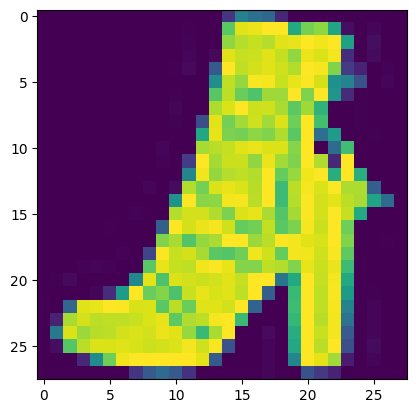

In [35]:
plt.imshow(c[3].numpy().reshape(28, 28))

In [30]:
c[0]

<tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],


In [11]:
import os
import requests
from bs4 import BeautifulSoup

# URL of the directory containing the images
base_url = "https://cdn.star.nesdis.noaa.gov/GOES18/ABI/SECTOR/ak/GEOCOLOR/"

# Create a directory to save the images
if not os.path.exists('images'):
    os.makedirs('images')

# Fetch the content of the URL
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the image links
images = soup.find_all('a')
for img in images:
    img_url = img.get('href')
    if img_url.endswith('500x500.jpg'):
        full_url = base_url + img_url
        img_data = requests.get(full_url).content
        with open(os.path.join('images', img_url), 'wb') as handler:
            handler.write(img_data)
        print(f"Downloaded {img_url}")

print("All images have been downloaded.")



Downloaded 20241620150_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620200_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620210_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620220_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620230_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620240_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620250_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620300_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620310_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620320_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620330_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620340_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620350_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620400_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620410_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620420_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 20241620430_GOES18-ABI-ak-GEOCOLOR-500x500.jpg
Downloaded 202

In [24]:
image = tf.io.read_file("./images/test.jpg")
image = tf.image.decode_image(image, channels=0, expand_animations=False)
#image = tf.image.resize(image, [128, 128])
image = image.numpy()
print(image.shape)

(500, 500, 3)


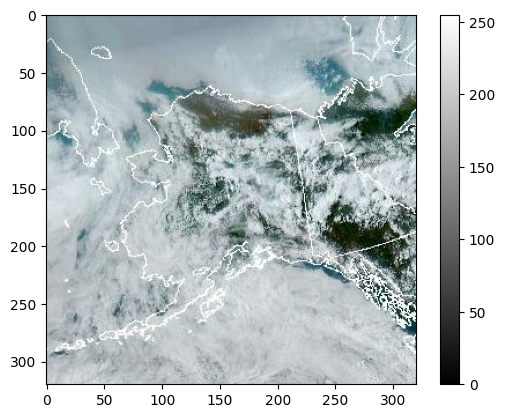

In [33]:
plt.imshow(image[80:400, 80:400], cmap='gray')
plt.colorbar()

In [35]:
from PIL import Image

img = Image.fromarray(image[80:400, 80:400])
img.save('flipped_image.png')

In [41]:
from datetime import datetime, timedelta

def convert_to_standard_timestamp(timestamp):
    # Extract year, day of the year, hour, and minute from the timestamp
    year = int(timestamp[:4])
    day_of_year = int(timestamp[4:7])
    hour = int(timestamp[7:9])
    minute = int(timestamp[9:11])

    # Convert day of the year to a date
    date = datetime(year, 1, 1) + timedelta(days=day_of_year - 1)

    # Combine date with hour and minute
    standard_timestamp = datetime(date.year, date.month, date.day, hour, minute)

    # Format to standard timestamp
    return standard_timestamp.strftime('%Y-%m-%d_%H-%M-%S')

# Example usage
timestamp = "20241720120"
standard_time = convert_to_standard_timestamp(timestamp)
standard_time

'2024-06-20_01-20-00'

In [3]:
[i for i in range(1, -1, -1)]

[1, 0]

In [5]:
[1, 2, 2] // 2

TypeError: unsupported operand type(s) for //: 'list' and 'int'